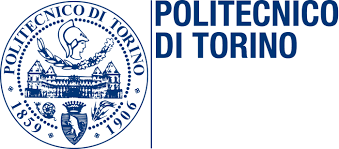

* **DATA SPACES**
* **Professor:FRANCESCO VACCARINO**
* **Student:TAHA ZAFAR**



 **TABLE OF CONTENT**

    1  Introduction
    2  Basic Data Analysis
    3  Data Processing
    4  Classification and Principal component analysis
        4.1  Logistic Regression
        4.2  Decision Tree
        4.3  Support-Vector Machine
        4.4  K-Nearest Neighbors
        4.5  Gaussion Naive Bayes
        4.6  Random Forest
    5  Classification and LDA
        5.1  Logistic Regression
        5.2  Decision Tree
        5.3  Support-Vector Machine
        5.4  K-Nearest Neighbors
        5.5  Gaussion Naive Bayes
        5.6  Random Forest
    6  Classification Without LDA and PCA
        6.1  Logistic Regression
        6.2  Decision Tree
        6.3  Support-Vector Machine
        6.4  K-Nearest Neighbors
        6.5  Gaussion Naive Bayes
        6.6  Random Forest        
        
    7  Results
    8  Comparison between different classsfication models
    9  SVC Optimization
    10 Random Forest optimiation
    11 Best model

# Introduction

We will be examining dataset of Steel Plate Faults by the Semeion Research Center of Sciences of Communication .The dataset is used for  detection of surface defects in steel plates. The steel plate dataset is hosted on the "UCI Machine Learning Repository".

The dataset was made up of 27 indicators that approximately [describe] the geometric shape of the defect.They are following:

1.     X_Minimum
1.     X_Maximum
1.     Y_Minimum
1.     Y_Maximum
1.     Pixels_Areas
1.     X_Perimeter
1.     Y_Perimeter
1.     Sum_of_Luminosity
1.     Minimum_of_Luminosity
1.     Maximum_of_Luminosity
1.     Length_of_Conveyer
1.     TypeOfSteel_A300
1.     TypeOfSteel_A400
1.     Steel_Plate_Thickness
1.     Edges_Index
1.     Empty_Index
1.     Square_Index
1.     Outside_X_Index
1.     Edges_X_Index
1.     Edges_Y_Index
1.     Outside_Global_Index
1.     LogOfAreas
1.     Log_X_Index
1.     Log_Y_Index
1.     Orientation_Index
1.     Luminosity_Index
1.     SigmoidOfAreas

    
    The dataset contains 7 defects(7 columns) which are following :
        The last seven columns are one hot encoded classes.We will find '1' if there is defect for that class else there will be '0'.

1.     Pastry
1.     Z_Scratch
1.     K_Scatch
1.     Stains
1.     Dirtiness
1.     Bumps
1.     Other_Faults


The analysis was conducted on Kaggle website.
Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data. You can compete on many problems.


    The packages used for data analytics were :
1.     SKLEARN
1.     PANDAS
1.     NUMPY
1.     MATPLOTLIB
1.     SEABORN
    


In [ ]:

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

# Basic Data Analysis

** Load dataset from CSV File using Pandas**

In [ ]:
X = pd.read_csv('../input/faults.csv')

As We can see we have 1941 entries and there is no null values.For this we will need comparatively less data processing e.g putting dummy entries.
We have total of 34 columns .

In [ ]:
X.info()

We will use head function of the pandas DataFrame object. The HEAD function takes the number of rows to be listed as parameters and lists from the first row. By default, the number of rows to list is 5.

In [ ]:
X.head()

The statistical summary of the properties in the data set is defined as **Descriptive Statistics**. It aims to present the summary and analysis of the descriptive statistical data set by statistical calculations.



The given statistical measures are:

1.     count= number of samples
1.     mean= the mean of this attribute among all samples
1.     std= the standard deviation of this attribute
1.     min= the minimal value of this attribute
1.     25%= the lower percentile
1.     50%= the median
1.     75%= the upper percentile
1.     max= the maximal value of this attribute


In [ ]:
display(X.describe(include="all"))

**HEATMAP**

A heat map is a graphical representation of data where the values contained in a matrix are represented as colors.
The heatmap on our data doesnot give any useful information.

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

**HISTOGRAM**

A histogram is an accurate representation of the distribution of numerical data

In [ ]:


X.hist(figsize=(20,20))
plt.show()



# Data Processing

 We are dividing our dateset in **features** and **faults** dataset.The faults dataset contains
7 columns while the features dataset contains 27 columns.

In [ ]:
X1 = X.values
y_dataframe =X[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]
features = X1[:,0:27]
x = pd.DataFrame(features)





In [ ]:
y_dataframe.info()

converting the faults dataset(7 colums) into single column

In [ ]:


# I want to get a single column for machine learning purpose -> DOING INVERSE OF ONE HOT ENCODING
y = []
for i in range(y_dataframe.shape[0]):
    if y_dataframe["Pastry"].values[i] == 1:
        y.append("Pastry")
    elif y_dataframe["Z_Scratch"].values[i] == 1:
        y.append("Z_Scratch")
    elif y_dataframe["K_Scatch"].values[i] == 1:
        y.append("K_Scatch")
    elif y_dataframe["Stains"].values[i] == 1:
        y.append("Stains")
    elif y_dataframe["Dirtiness"].values[i] == 1:
        y.append("Dirtiness")
    elif y_dataframe["Bumps"].values[i] == 1:
        y.append("Bumps")
    else:
        y.append("Other_Faults")

In [ ]:
y=np.array(y)

In [ ]:
y.shape

In [ ]:

faultstype= pd.DataFrame({'faults':y})

Faults dataset description

In [ ]:
faultstype.describe()

**Heatmap**

*There is inexistant correlation between different faults.*

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
corr = y_dataframe.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

As its evident from the charts that our faults # in decreasing order are :

1. OTHER FAULTS
1. BUMPS
1. K SCRATCH
1. Z SCRATCH
1. PASTRY 
1. STAINS 
1. DIRTINESS

The other_faults category has overwhelming majority as compared to all other type of faults.The dataset is not perfectly balanced but it works fine .

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(20,8))

faultstype['faults'].value_counts().plot.pie(ax=ax[0])
sns.countplot(x='faults', data=faultstype, ax=ax[1])






# Classification using Principal component analysis

 PCA reduces a large number of variables into a set of PC axes . It attempts to capture the information from the input variables and reduce them to a few axes. The number of PC axes that end up being important are determined by the Eigenvalues of each axis. The usual cut-off point to consider a PC "important" is an eigenvalue of ≥ 1. PC1 will always have the highest eigenvalue, followed by PC2,PC3 ETC. 



The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent. The same is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) and are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components. The principal components are the eigenvectors of a covariance matrix, and hence they are orthogonal.

Importantly, the dataset on which PCA technique is to be used must be scaled. The results are also sensitive to the relative scaling. As a layman, it is a method of summarizing data. Imagine some wine bottles on a dining table. Each wine is described by its attributes like colour, strength, age, etc. But redundancy will arise because many of them will measure related properties. So what PCA will do in this case is summarize each wine in the stock with less characteristics.           

Intuitively, Principal Component Analysis can supply the user with a lower-dimensional picture, a projection or "shadow" of this object when viewed from its most informative viewpoint.

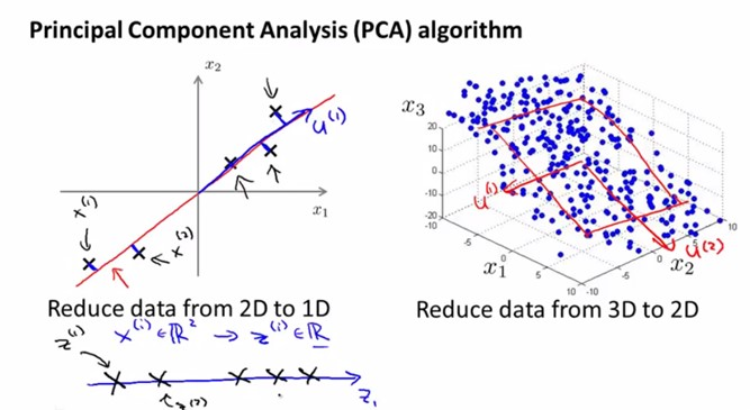

source > https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

**Data Strandadization **

Using variables without standardization in effect gives the variable with the larger range a larger weight in the analysis. Transforming the data to comparable scales can prevent this problem.

In [ ]:
sc=StandardScaler()
X=sc.fit_transform(x)


In [ ]:
faultstype.shape

**TRAIN TEST DATA SPLIT **

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 42)

**we will take 10 principal components ,Please note we had 27 variables .**

In [ ]:


pca=PCA(10)
pca.fit(x_test)
pca.explained_variance_ratio_



In [ ]:
pca_train=pca.transform(x_train)
pca_test=pca.transform(x_test)
pca_train=x_train
pca_test=x_test


In [ ]:
pca_score= np.zeros(6)
pca_accuracy= np.zeros(6)





**Logistic regression**

**Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable**

**Linear Regression Vs. Logistic Regression**

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

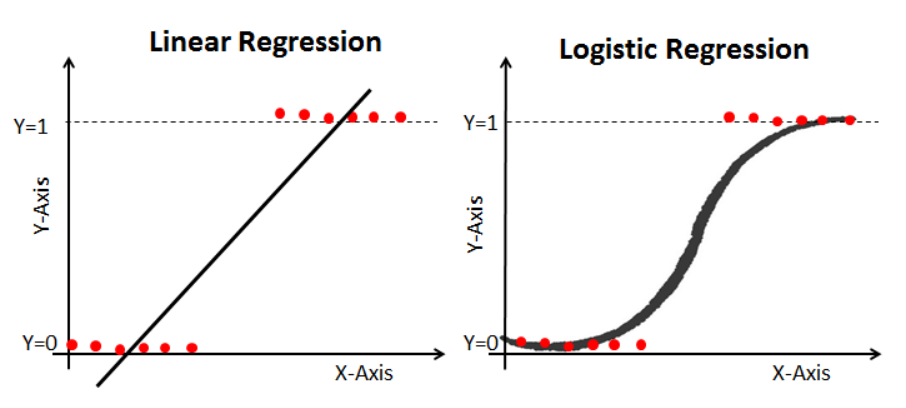

**Sigmoid Function**

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.


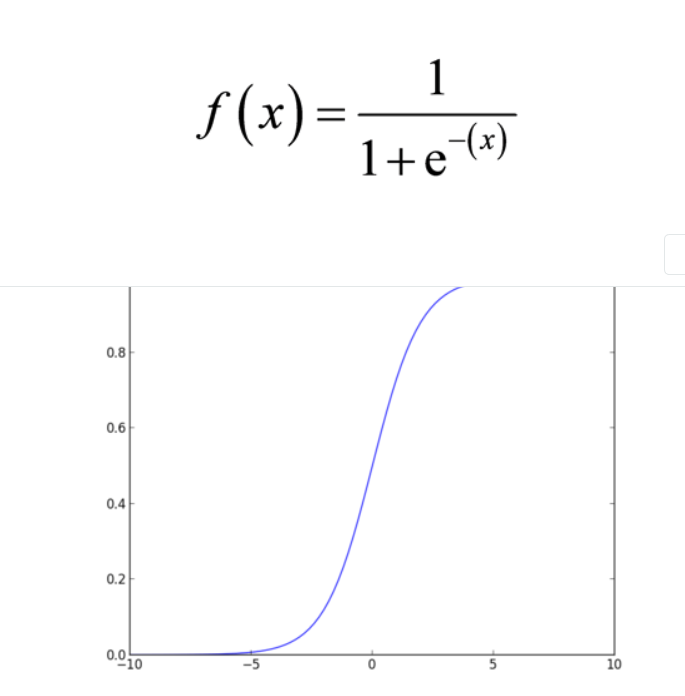

source > https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [ ]:
Logistic_Regression = LR().fit(pca_train,y_train)
pca_score[0]=Logistic_Regression.score(pca_train,y_train)
predictions_LR = Logistic_Regression.predict(pca_test)
pca_accuracy[0]=accuracy_score(y_test, predictions_LR)


**Decision Tree**

**Decision tree builds classification or regression models in the form of a tree structure**

pseudo code of decision tree 

<a href="https://www.researchgate.net/figure/Pseudocode-of-decision-tree-learning_fig1_233410133"><img src="https://www.researchgate.net/publication/233410133/figure/fig1/AS:216441321201664@1428615040196/Pseudocode-of-decision-tree-learning.png" alt="Pseudocode of decision tree learning."/></a>

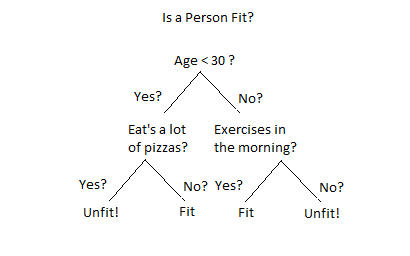

Available from: https://www.researchgate.net/figure/Pseudocode-of-decision-tree-learning_fig1_233410133
                https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248 

In [ ]:
Decision_Tree_Classifier = DTC().fit(pca_train,y_train)
pca_score[1]=Decision_Tree_Classifier.score(pca_train,y_train)
predictions_DTC = Decision_Tree_Classifier.predict(pca_test)
pca_accuracy[1]=accuracy_score(y_test, predictions_DTC)

**SVC**

**An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap possible**

**What is Support Vector Machine?**

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

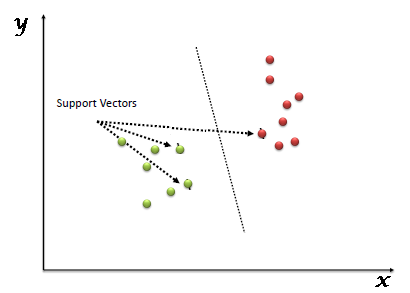

Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

**How does it work?**

Above, we got accustomed to the process of segregating the two classes with a hyper-plane. Now the burning question is “How can we identify the right hyper-plane?”. Don’t worry, it’s not as hard as you think!

Let’s understand

    Identify the right hyper-plane (Scenario-1): Here, we have three hyper-planes (A, B and C). Now, identify the right hyper-plane to classify star and circle.
    
 
 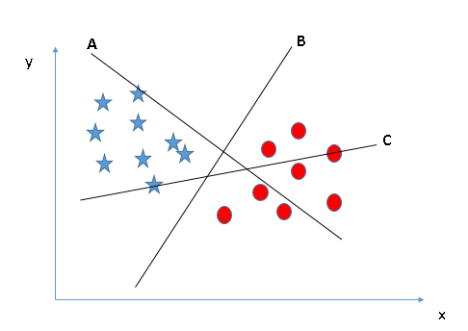
    
    you need to remember a thumb rule to identify the right hyper-plane: “Select the hyper-plane which segregates the two classes better”. In this scenario, hyper-plane “B” has excellently performed this job.

Source > https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [ ]:
from sklearn.svm import SVC
SVC = SVC().fit(pca_train,y_train)
pca_score[2]=SVC.score(pca_train,y_train)
predictions_SVC = SVC.predict(pca_test)
pca_accuracy[2]=accuracy_score(y_test, predictions_SVC)



**K-Nearest Neigbours**

**It works based on minimum distance from the query instance to the training samples to determine the K-nearest neighbors.**

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.

As an example, consider the following table of data points containing two features:
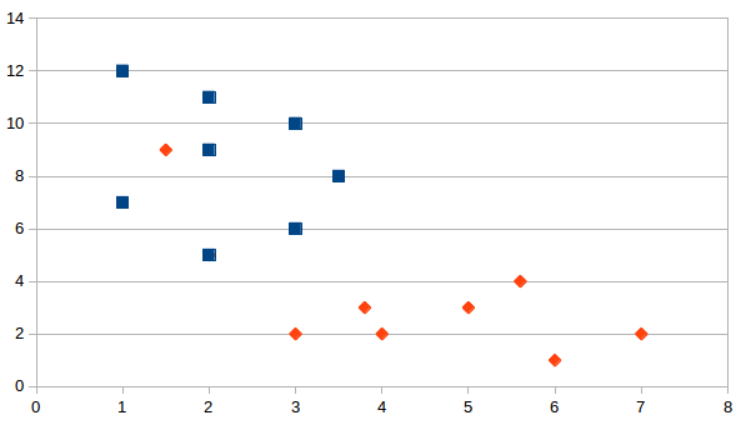

Now, given another set of data points (also called testing data), allocate these points a group by analyzing the training set. Note that the unclassified points are marked as ‘yellow’.


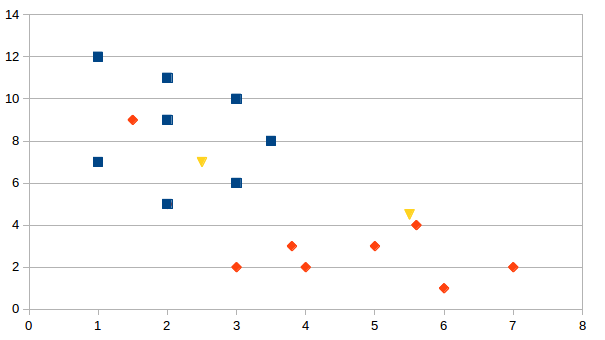

**KNN pseudo code**

Let m be the number of training data samples. Let p be an unknown point.

*     Store the training samples in an array of data points arr[]. This means each element of this array represents a tuple (x, y).
*     for i=0 to m: Calculate Euclidean distance d(arr[i], p).
*     Make set S of K smallest distances obtained. Each of these distances correspond to an already classified data point.
*     Return the majority label among S.

SOURCE > https://medium.com/@chiragsehra42/k-nearest-neighbors-explained-easily-c26706aa5c7f

In [ ]:
K_Neighbors_Classifier = KNC(8).fit(pca_train,y_train)
pca_score[3]=K_Neighbors_Classifier.score(pca_train,y_train)
predictions_KNC = K_Neighbors_Classifier.predict(pca_test)
pca_accuracy[3]=accuracy_score(y_test, predictions_KNC)

**GAUSSIAN NAIVE BAYES**


**It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors**

**Bayes’ Theorem**

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:


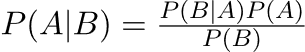

where A and B are events and P(B) ? 0.

    Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
    P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
    P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.



**Gaussian Naive Bayes classifier**

In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. A Gaussian distribution is also called Normal distribution. When plotted, it gives a bell shaped curve which is symmetric about the mean of the feature values as shown below:

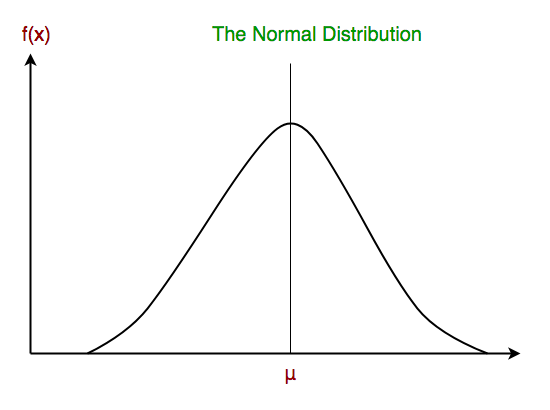




The likelihood of the features is assumed to be Gaussian, hence, conditional probability is given by:

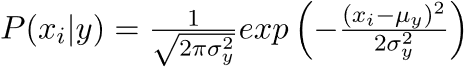

source > https://www.geeksforgeeks.org/naive-bayes-classifiers/

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB

GNB = GNB().fit(pca_train,y_train)
pca_score[4]=GNB.score(pca_train,y_train)
predictions_GNB= GNB.predict(pca_test)
pca_accuracy[4]=accuracy_score(y_test, predictions_GNB)



**Random Forest**

**In Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree**

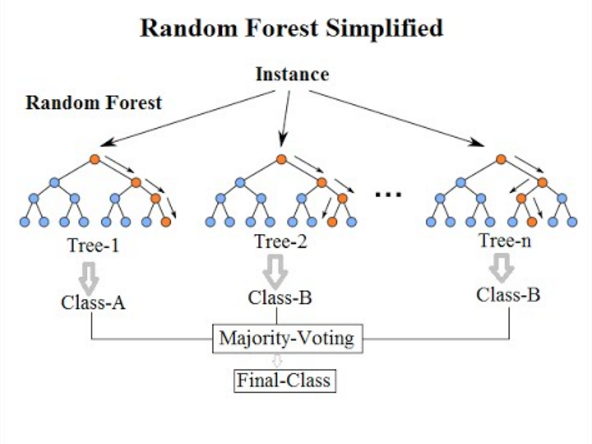


Basic building block of random forest is decision tree.
Machine learning may seem intimidating at first, but the entire field is just many simple ideas combined together to yield extremely accurate models that can ‘learn’ from past data. The random forest is no exception. There are two fundamental ideas behind a random forest, both of which are well known to us in our daily life:

*     Constructing a flowchart of questions and answers leading to a decision
*     The wisdom of the (random and diverse) crowd

source > https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

In [ ]:
RF = RF().fit(pca_train,y_train)
pca_score[5]=RF.score(pca_train,y_train)
predictions_RF= RF.predict(pca_test)
pca_accuracy[5]=accuracy_score(y_test, predictions_RF)

# Classification and LDA

**Linear Discriminant Analysis is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning purposes.**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda_train = lda.fit(x_test, y_test)


In [ ]:
lda_train=lda.transform(x_train)
lda_test=lda.transform(x_test)

In [ ]:
lda_score= np.zeros(6)
lda_accuracy= np.zeros(6)

**Logistic Regression**

In [ ]:
Logistic_Regression = LR().fit(lda_train,y_train)
lda_score[0]=Logistic_Regression.score(lda_train,y_train)
predictions_LR = Logistic_Regression.predict(lda_test)
lda_accuracy[0]=accuracy_score(y_test, predictions_LR)

**Decision Tree**

In [ ]:
Decision_Tree_Classifier = DTC().fit(lda_train,y_train)
lda_score[1]=Decision_Tree_Classifier.score(lda_train,y_train)
predictions_DTC = Decision_Tree_Classifier.predict(lda_test)
lda_accuracy[1]=accuracy_score(y_test, predictions_DTC)

**SVC**

In [ ]:
from sklearn.svm import SVC
SVC = SVC().fit(lda_train,y_train)
lda_score[2]=SVC.score(lda_train,y_train)
predictions_SVC = SVC.predict(lda_test)
lda_accuracy[2]=accuracy_score(y_test, predictions_SVC)

**KNC**

In [ ]:
K_Neighbors_Classifier = KNC(10).fit(lda_train,y_train)
lda_score[3]=K_Neighbors_Classifier.score(lda_train,y_train)
predictions_KNC = K_Neighbors_Classifier.predict(lda_test)
lda_accuracy[3]=accuracy_score(y_test, predictions_KNC)

**GNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB

GNB = GNB().fit(lda_train,y_train)
lda_score[4]=GNB.score(lda_train,y_train)
predictions_GNB= GNB.predict(lda_test)
lda_accuracy[4]=accuracy_score(y_test, predictions_GNB)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
RF = RF().fit(lda_train,y_train)
lda_score[5]=RF.score(lda_train,y_train)
predictions_RF= RF.predict(lda_test)
lda_accuracy[5]=accuracy_score(y_test, predictions_RF)

# Simple Classification

In [ ]:

simple_score= np.zeros(6)
simple_accuracy= np.zeros(6)

**LOGISTIC REGRESSION**

In [ ]:
Logistic_Regression = LR().fit(x_train,y_train)
simple_score[0]=Logistic_Regression.score(x_train,y_train)
predictions_LR = Logistic_Regression.predict(x_test)
simple_accuracy[0]=accuracy_score(y_test, predictions_LR)

**Decision Tree Classifier**

In [ ]:
Decision_Tree_Classifier = DTC().fit(x_train,y_train)
simple_score[1]=Decision_Tree_Classifier.score(x_train,y_train)
predictions_DTC = Decision_Tree_Classifier.predict(x_test)
simple_accuracy[1]=accuracy_score(y_test, predictions_DTC)

**SVC**

In [ ]:
from sklearn.svm import SVC
SVC = SVC().fit(x_train,y_train)
simple_score[2]=SVC.score(x_train,y_train)
predictions_SVC = SVC.predict(x_test)
simple_accuracy[2]=accuracy_score(y_test, predictions_SVC)

**K NEIGHBOURS CLASSIFIER**

In [ ]:
K_Neighbors_Classifier = KNC(10).fit(x_train,y_train)
simple_score[3]=K_Neighbors_Classifier.score(x_train,y_train)
predictions_KNC = K_Neighbors_Classifier.predict(x_test)
simple_accuracy[3]=accuracy_score(y_test, predictions_KNC)

**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB

GNB = GNB().fit(x_train,y_train)
simple_score[4]=GNB.score(x_train,y_train)
predictions_GNB= GNB.predict(x_test)
simple_accuracy[4]=accuracy_score(y_test, predictions_GNB)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
RF = RF(10).fit(x_train,y_train)
simple_score[5]=RF.score(x_train,y_train)
predictions_RF= RF.predict(x_test)
simple_accuracy[5]=accuracy_score(y_test, predictions_RF)

 # **Results**

**WHAT IS SCORE AND ACCURACY ?**

SCORE IS THE MEASURE OF PREDICTIONS WHEN WE TEST OUR MODEL ON THE **SAME** VALUES AS WERE GIVEN TO IT AS INPUT ,for example (training dataset).
For this reason the scores can be very **high** in some models.

ACCURACY IS THE MEASURE OF PREDICTIONS WHEN WE TEST OUR MODEL ON **DIFFERENT** DATA AS WAS GIVEN TO IT AS INPUT.fOR EXAMPLE TESTING ON (TEST DATASET).Accuracy is  **reliable** measure 

** SCORE WITHOUT PCA AND LDA**

*Decison Tree AND RANDOM fOREST ARE GIVING UNREASONABILY HIGH SCORES BECAUSE OF OVERFITTING THEIR TRAINING DATA.*

In [ ]:


objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
SCORES = [simple_score[0]*100,simple_score[1]*100,simple_score[2]*100,simple_score[3]*100,simple_score[4]*100,simple_score[5]*100]

plt.bar(y_pos, SCORES,color='#7f6d5f', align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('scores without LDA & PCA')
plt.title('MACHINE LEARNING MODELS')

plt.show()

**ACCURACY WITHOUT PCA AND LDA**

***SVC** HAS ACCURACY OF **ABOVE 75%**, IS CLEARLY THE WINNER HERE.*
*WHILE LOGISTIC REGRESSION,K NEIGHBOURS AND RANDOM FOREST PERFORMS WELL **ABOVE 70%**.*

In [ ]:


objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
obj = np.arange(len(objects))
SCORES = [simple_accuracy[0]*100,simple_accuracy[1]*100,simple_accuracy[2]*100,simple_accuracy[3]*100,simple_accuracy[4]*100,simple_accuracy[5]*100]

plt.bar(y_pos, SCORES,color='#7f6d5f', align='center', alpha=0.5)
plt.xticks(obj, objects)
plt.ylabel('Accuracy without LDA & PCA')
plt.title('MACHINE LEARNING MODELS')

plt.show()

**SCORE WITH PCA**

*AGAIN RANDOM FOREST AND DECISION TREE PERFORMS UNREASONABLY GOOD.THE MODELS ARE OVER FITTING THE DATASET .* *WE DONT NEED TO WORRY ABOUT IT AS MODELS OFTEN OVERFIT THEIR TRAINING DATASET.*

In [ ]:


objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
SCORES = [pca_score[0]*100,pca_score[1]*100,pca_score[2]*100,pca_score[3]*100,pca_score[4]*100,pca_score[5]*100]

plt.bar(y_pos, SCORES,color='#557f2d' ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('scores with PCA')
plt.title('MACHINE LEARNING MODELS')

plt.show()

**ACCURACY WITH PCA**

***SVC** HAS ACCURACY OF **ABOVE 75%**, IS CLEARLY THE WINNER HERE.*
*WHILE LOGISTIC REGRESSION,K NEIGHBOURS AND RANDOM FOREST PERFORMS WELL **ABOVE 70%**.*

In [ ]:


objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
SCORES = [pca_accuracy[0]*100,pca_accuracy[1]*100,pca_accuracy[2]*100,pca_accuracy[3]*100,pca_accuracy[4]*100,pca_accuracy[5]*100]

plt.bar(y_pos, SCORES,color='#557f2d', align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ACCURACY WITH PCA')
plt.title('MACHINE LEARNING MODELS')

plt.show()

**SCORE WITH LDA**

*AGAIN RANDOM FOREST AND DECISION TREE PERFORMS UNREASONABLY GOOD.THE MODELS ARE OVER FITTING THE DATASET .* *WE DONT NEED TO WORRY ABOUT IT AS MODELS OFTEN OVERFIT THEIR TRAINING DATASET.*

In [ ]:


objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
SCORES = [lda_score[0]*100,lda_score[1]*100,lda_score[2]*100,lda_score[3]*100,lda_score[4]*100,lda_score[5]*100]

plt.bar(y_pos, SCORES,color='#2d7f5e',align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('scores with LDA ')
plt.title('MACHINE LEARNING MODELS')

plt.show()

**ACCURACY WITH LDA**

 **SVC** HAS ACCURACY OF **ABOVE 75%**, IS CLEARLY THE WINNER HERE.*
*WHILE LOGISTIC REGRESSION,K NEIGHBOURS AND RANDOM FOREST PERFORMS WELL **ABOVE 70%**. 

In [ ]:

objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
SCORES = [lda_accuracy[0]*100,lda_accuracy[1]*100,lda_accuracy[2]*100,lda_accuracy[3]*100,lda_accuracy[4]*100,lda_accuracy[5]*100]

plt.bar(y_pos, SCORES,color='#2d7f5e', align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy with LDA ')
plt.title('MACHINE LEARNING MODELS')

plt.show()

# COMPARISON

  **COMPARISON OF CLASSIFICATION ALGORITHMS SCORES W.R.T PCA,LDA AND SIMPLE TECHNIQUE**

**SCORES**

**Decison treee is over perfoming while Gassian-NB under performs.SVC has reasonable score nearing 80%.**

In [ ]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [lda_score[0]*100,lda_score[1]*100,lda_score[2]*100,lda_score[3]*100,lda_score[4]*100,lda_accuracy[5]*100]
bars2 = [pca_score[0]*100,pca_score[1]*100,pca_score[2]*100,pca_score[3]*100,pca_score[4]*100,pca_accuracy[5]*100]
bars3 = [simple_score[0]*100,simple_score[1]*100,simple_score[2]*100,simple_score[3]*100,simple_score[4]*100,simple_score[5]*100]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='LDA')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='PCA')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='SIMPLE')
 
# Add xticks on the middle of the group bars
plt.xlabel('MODELS', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

 **COMPARISON OF CLASSIFICATION ALGORITHMS ACCURACIES W.R.T PCA,LDA AND SIMPLE TECHNIQUE**

***SVC** HAS ACCURACY OF **ABOVE 75%**, IS CLEARLY THE WINNER HERE.*
*WHILE LOGISTIC REGRESSION,K NEIGHBOURS AND RANDOM FOREST PERFORMS WELL **ABOVE 70%**.*

**Gaussian NB** is underperforming. 

In [ ]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [lda_accuracy[0]*100,lda_accuracy[1]*100,lda_accuracy[2]*100,lda_accuracy[3]*100,lda_accuracy[4]*100,lda_accuracy[5]*100]
bars2 = [pca_accuracy[0]*100,pca_accuracy[1]*100,pca_accuracy[2]*100,pca_accuracy[3]*100,pca_accuracy[4]*100,pca_accuracy[5]*100]
bars3 = [simple_accuracy[0]*100,simple_accuracy[1]*100,simple_accuracy[2]*100,simple_accuracy[3]*100,simple_accuracy[4]*100,simple_accuracy[5]*100]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='LDA')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='PCA')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='SIMPLE')
 
# Add xticks on the middle of the group bars
plt.xlabel('MODELS', fontweight='bold')
plt.ylabel('ACCURACY', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

# **SVC Optimization**

**For rbf kernel our best parameters are {'C': 10, 'gamma': 0.1}.**


As we have seen in our previous data analysis that svc has outperformed all the models.What can we do to increase its accuracy more.Lets see.

In [ ]:
from sklearn.svm import SVC
param1 = [0.001, 0.01, 0.1, 1, 10]
param2 = [0.001, 0.01, 0.1, 1]
param_grid = {'C': param1, 'gamma' : param2}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
grid_search.fit(x_train, y_train)
print (grid_search.best_params_)



**For Linear kernel our best parameters are {'C': 1, 'gamma': 0.001}.**


In [ ]:
from sklearn.svm import SVC
param1 = [0.001, 0.01, 0.1, 1, 10]
param2= [0.001, 0.01, 0.1, 1]
param_grid = {'C': param1, 'gamma' : param2}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(x_train, y_train)
print (grid_search.best_params_)


**our accuracy with kernel='rbf', C=10, gamma=0.1 is 76 percent.**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', C=10, gamma=0.1).fit(x_train,y_train)
predictions_SVC = SVC.predict(x_test)
accuracy_score(y_test, predictions_SVC)

**Our accuracy with kernel='linear', C=1, gamma=0.001 is 73.9 percent.**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear', C=1, gamma=0.001).fit(x_train,y_train)

predictions_SVC = SVC.predict(x_test)
accuracy_score(y_test, predictions_SVC)

**For rbf kernel with " LDA " our best parameters are {'C': 10, 'gamma': 0.1}.**

In [ ]:
from sklearn.svm import SVC
param1 = [0.001, 0.01, 0.1, 1, 10]
param2 = [0.001, 0.01, 0.1, 1]
param_grid = {'C': param1, 'gamma' : param2}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
grid_search.fit(lda_train, y_train)
print (grid_search.best_params_)


**For rbf kernel with " LDA " our accuracy is 75.1 percent.**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', C=10, gamma=0.1).fit(lda_train,y_train)

predictions_SVC = SVC.predict(lda_test)
accuracy_score(y_test, predictions_SVC)

**For linear  kernel with " LDA " our best parameters are {'C': 1, 'gamma': 0.001}.**

In [ ]:
from sklearn.svm import SVC
param1 = [0.001, 0.01, 0.1, 1, 10]
param2 = [0.001, 0.01, 0.1, 1]
param_grid = {'C': param1, 'gamma' : param2}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(lda_train, y_train)
print (grid_search.best_params_)

 **For linear  kernel with " LDA " our accuracy is 73.1 percent.**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear', C=1, gamma=0.001).fit(lda_train,y_train)

predictions_SVC = SVC.predict(lda_test)
accuracy_score(y_test, predictions_SVC)

**For rbf  kernel with " PCA " our best parameters are {'C': 10, 'gamma': 0.1}**

In [ ]:
from sklearn.svm import SVC
param1 = [0.001, 0.01, 0.1, 1, 10]
param2 = [0.001, 0.01, 0.1, 1]
param_grid = {'C': param1, 'gamma' : param2}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
grid_search.fit(pca_train, y_train)
print (grid_search.best_params_)

**For rbf  kernel with " PCA " our accuracy is 76 percent.**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', C=10, gamma=0.1).fit(pca_train,y_train)

predictions_SVC = SVC.predict(pca_test)
accuracy_score(y_test, predictions_SVC)

**For linear  kernel with " PCA " our best parameters are {'C': 1, 'gamma': 0.001}**

In [ ]:
from sklearn.svm import SVC
param1 = [0.001, 0.01, 0.1, 1, 10]
param2 = [0.001, 0.01, 0.1, 1]
param_grid = {'C': param1, 'gamma' : param2}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10)
grid_search.fit(pca_train, y_train)
print (grid_search.best_params_)

**For linear  kernel with " PCA " our accuracy is 73.9 percent.**

In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear', C=1, gamma=0.001).fit(pca_train,y_train)

predictions_SVC = SVC.predict(pca_test)
accuracy_score(y_test, predictions_SVC)

# Random forest optimization

**This grid search for random forest consumes alot of cpu+gpu power.I did grid search on some other cpu and wrote results here.**

Training of models hace a very bad carbon footprint

Please for information on training costs of a model see here : https://interestingengineering.com/training-ai-is-shockingly-costly-to-the-environment

In [ ]:
# from sklearn.ensemble import RandomForestClassifier as RF
# 
# param_grid = { 
#     'n_estimators': [50,100,200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
*     'max_depth' : [3,4,5,6,7,8],
*     'criterion' :['entropy', 'gini']
* }
* 
* grid_search = GridSearchCV(RF(), param_grid, cv=10)
* grid_search.fit(x_train, y_train)
* print (grid_search.best_params_)

**Best parameters are {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}**

 **Our accuracy wih these parameters in 78.4 % .**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
RF = RF(criterion='entropy', max_depth=7,max_features='sqrt',n_estimators= 200).fit(x_train,y_train)
predictions_RF= RF.predict(x_test)
accuracy_score(y_test, predictions_RF)


** Random Forest with 'PCA' best parameters are criterion='entropy', max_depth=8,max_features='sqrt',n_estimators= 500.**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier as RF

# param_grid = { 
#    'n_estimators': [50,100,200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [3,4,5,6,7,8],
#     'criterion' :['entropy', 'gini']
# }
# 
# grid_search = GridSearchCV(RF(), param_grid, cv=10)
# grid_search.fit(pca_train, y_train)
# print (grid_search.best_params_)

**Accuracy with criterion='entropy', max_depth=8,max_features='sqrt',n_estimators= 500 and PCA 78.5 %. **

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
RF = RF(criterion='entropy', max_depth=8,max_features='sqrt',n_estimators= 500).fit(pca_train,y_train)
predictions_RF= RF.predict(pca_test)
accuracy_score(y_test, predictions_RF)


# Best Model

    As we had a classification problem at hand ,where data can be classfied in 7 different types.All algorithms used i.e Logistic regression ,Decision tree ,svc ,k_neigbours ,Gaussian NB,Random Forest are good for classification problem.
    The algorithms which worked well with our dataset in decreasing order are >
*     RANDOM FOREST criterion='entropy', max_depth=8,max_features='sqrt',n_estimators= 500 with 'PCA'
*     SVC WITH PARAMETERS kernel='rbf', C=10, gamma=0.1 .
*     LOGISTIC REGRESSION 
*     K NEIGBOURS
*     DECISION TREE
*     GAUSSIAN NB

Random Forest And SVC performed quite reasonably well both in training scores and test accuracy .